In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
#Load flower data
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/'\
            'curric-data-001-data-sets/master/iris/iris.data.csv'

petal_data = pd.read_csv(data_url, header = None, delimiter = ',')
petal_data.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'f_type']
petal_data['f_type'] = petal_data['f_type'].astype('category')

#Separate into categories
setosa = petal_data[petal_data['f_type'] 
                    == [petal_data['f_type'].cat.categories[0]]]

versicolor = petal_data[petal_data['f_type'] 
                        == [petal_data['f_type'].cat.categories[1]]]

virginica = petal_data[petal_data['f_type'] 
                       == [petal_data['f_type'].cat.categories[2]]]

virginica.head()

,sepal_len,sepal_wid,petal_len,petal_wid,f_type
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


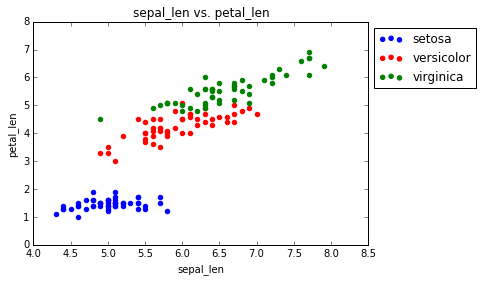

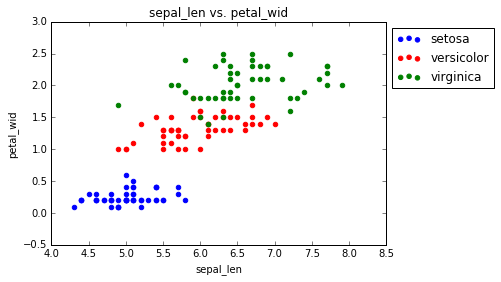

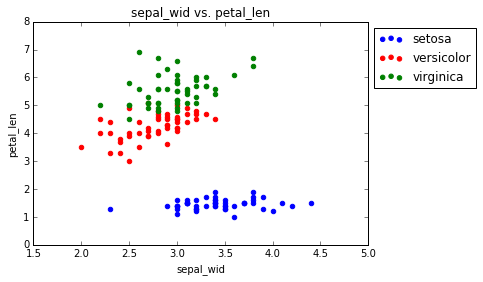

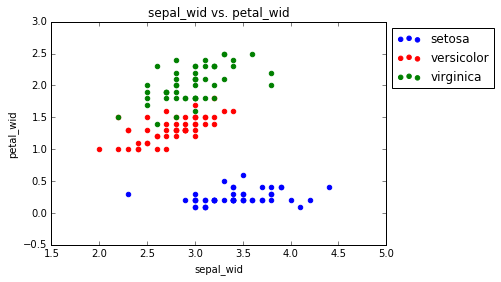

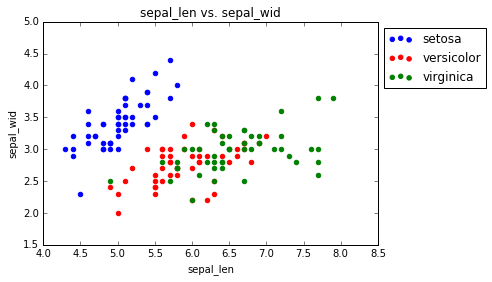

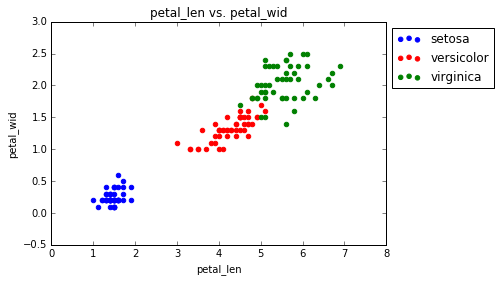

In [23]:
#Plot sepal length vs sepal width
plt_groups = [  ['sepal_len', 'petal_len'],
                ['sepal_len', 'petal_wid'],
                ['sepal_wid', 'petal_len'],
                ['sepal_wid', 'petal_wid'],
                ['sepal_len', 'sepal_wid'],
                ['petal_len', 'petal_wid'] ]

for grp in plt_groups:
    
    plt.figure()
    
    plt.scatter(setosa[grp[0]], setosa[grp[1]], color = 'blue')
    plt.scatter(versicolor[grp[0]], versicolor[grp[1]], color = 'red')
    plt.scatter(virginica[grp[0]], virginica[grp[1]], color = 'green')
    
    plt.xlabel(grp[0])
    plt.ylabel(grp[1])
    plt.legend(['setosa', 'versicolor', 'virginica'], loc = 'upper left', bbox_to_anchor = (1, 1))
    plt.title(grp[0] + ' vs. ' + grp[1])

In [82]:
def knn(data, len_label, wid_label, f_type):
    #Function Input:
    #data = DataFrame of length, width and categorical data
    #len_label = String defining length data column
    #wid_label = String defining width data column
    #f_type = String defining categorical data column
    
    #Select random point and extract data
    pt = random.choice(data.index)
    len_point = data[len_label].loc[pt]
    wid_point = data[wid_label].loc[pt]
    
    nearest = pd.DataFrame(columns = ['distance', 'f_type'])
    nearest['distance'] = pow( 
                              pow(data[len_label] - len_point, 2) 
                            + pow(data[wid_label] - wid_point, 2)
                            , 0.5)
    nearest['f_type'] = data[f_type]
    
    nearest = nearest.sort_values(by = ['distance'])
    nearest = nearest.reset_index(drop = True)
    
    max_counts = (nearest['f_type'][1:11]).value_counts().max()
    counts = (nearest['f_type'][1:11]).value_counts()
    count = counts[counts == max_counts].index
    
    return(nearest, pt, count[0])

In [86]:
for i in range(10):
    print('Iteration %d' % i)
    near, pt, count = knn(petal_data, 
                          'sepal_len', 
                          'sepal_wid', 
                          'f_type')
    print('Majority class is %s' % count)
    print('Data point %d was selected' % pt)
    print('Data point class is %s\n' % petal_data['f_type'].loc[pt])

Iteration 0
Majority class is Iris-virginica
Data point 130 was selected
Data point class is Iris-virginica

Iteration 1
Majority class is Iris-virginica
Data point 118 was selected
Data point class is Iris-virginica

Iteration 2
Majority class is Iris-setosa
Data point 38 was selected
Data point class is Iris-setosa

Iteration 3
Majority class is Iris-versicolor
Data point 77 was selected
Data point class is Iris-versicolor

Iteration 4
Majority class is Iris-virginica
Data point 54 was selected
Data point class is Iris-versicolor

Iteration 5
Majority class is Iris-setosa
Data point 33 was selected
Data point class is Iris-setosa

Iteration 6
Majority class is Iris-setosa
Data point 106 was selected
Data point class is Iris-virginica

Iteration 7
Majority class is Iris-setosa
Data point 6 was selected
Data point class is Iris-setosa

Iteration 8
Majority class is Iris-virginica
Data point 105 was selected
Data point class is Iris-virginica

Iteration 9
Majority class is Iris-setosa
D

In [ ]:
#kNN is highly dependent on the arithmetic used to compare the
#neighbors against the point under evaluation.  For example, if
#all neighbors were used to judge the classification of a point.
#All points would be classified as whichever type is most frequent
#for the entire data set.  Therefore, kNN is sensitive to the
#distance arithmetic used to include or exclude neighbors from a
#classification.  To over simplify; too small of distance and 
#kNN doesn't help infer classification of point and too large of 
#distance and kNN over generalizes the data population.